#  Find the scale incoming U for all runs

In [30]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns

# remove these when canyon records is turned into package or something like that:
import os
import sys

In [6]:
lib_path = os.path.abspath('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/PythonScripts/Paper1Figures/') # Add absolute path to my python scripts
sys.path.append(lib_path)

import canyon_records 
records = canyon_records.main()

In [28]:
filegrid = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 

with Dataset(filegrid, 'r') as nbl:
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    RC = nbl.variables['RC'][:]
    HFacW = nbl.variables['HFacW'][:,:,:]
    
hfac = np.ma.masked_values(HFacW.data, 0)
maskU = np.ma.getmask(hfac)


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


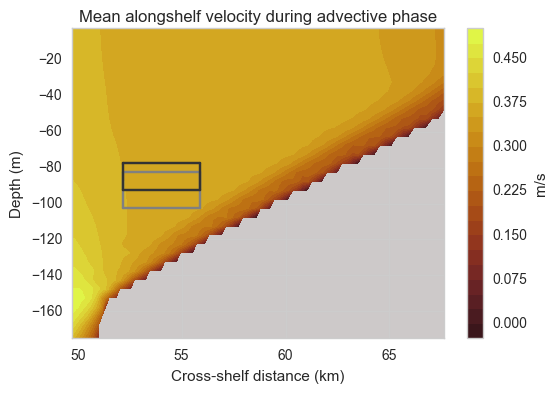

In [45]:
sns.set_context('notebook')
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,1,figsize=(6,4), sharey = True)
ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

filestate = ('/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc' )
   
with Dataset(filestate, 'r') as nbl:
    u_CS = nbl.variables['U'][8:18,:35,215:300,120]
        
CF = ax.contourf(Y[215:300]/1000,RC[:35],np.ma.masked_array(np.mean(u_CS,axis=0), mask=maskU[0:35,215:300,120]),20,
            cmap = cmo.cm.solar)
CB = plt.colorbar(CF,ax=ax)
CB.set_label('m/s')

# my U box
ax.plot(Y[230:251]/1000,(RC[20])*np.ones(np.shape(Y[230:251])),color='0.5')
ax.plot(Y[230:251]/1000,(RC[16])*np.ones(np.shape(Y[230:251])),color='0.5')
ax.plot(((Y[230]/1000))*np.ones(np.shape(RC[16:21])),RC[16:21],color='0.5')
ax.plot(((Y[250]/1000))*np.ones(np.shape(RC[16:21])),RC[16:21],color='0.5')

# approx location of Tara's profiles
ax.plot(Y[230:251]/1000,(RC[18])*np.ones(np.shape(Y[230:251])),color='0.2')
ax.plot(Y[230:251]/1000,(RC[15])*np.ones(np.shape(Y[230:251])),color='0.2')
ax.plot(((Y[230]/1000))*np.ones(np.shape(RC[15:19])),RC[15:19],color='0.2')
ax.plot(((Y[250]/1000))*np.ones(np.shape(RC[15:19])),RC[15:19],color='0.2')

ax.set_ylabel('Depth (m)')
ax.set_xlabel('Cross-shelf distance (km)')
ax.set_title('Mean alongshelf velocity during advective phase')
ax.legend(loc=0)    

The black box is where HA 2013 put their profiles and the grey box is my U box.

Base : 0.361 $\pm$ 0.012 ms$^-1$
higher\_Kbg : 0.358 $\pm$ 0.013 ms$^-1$
highest\_Kbg : 0.317 $\pm$ 0.019 ms$^-1$
higher\_N : 0.377 $\pm$ 0.013 ms$^-1$
highest\_N : 0.398 $\pm$ 0.014 ms$^-1$
lower\_N : 0.341 $\pm$ 0.011 ms$^-1$
higher\_f : 0.357 $\pm$ 0.012 ms$^-1$
low\_f : 0.389 $\pm$ 0.015 ms$^-1$
lower\_f : 0.375 $\pm$ 0.013 ms$^-1$
lowest\_f : 0.410 $\pm$ 0.018 ms$^-1$
highestKc\_lowKbg : 0.352 $\pm$ 0.011 ms$^-1$
higherKc\_lowKbg : 0.357 $\pm$ 0.011 ms$^-1$
higher\_Kc : 0.357 $\pm$ 0.011 ms$^-1$
high\_Kc : 0.352 $\pm$ 0.011 ms$^-1$
high2\_Kc : 0.344 $\pm$ 0.009 ms$^-1$
highest\_Kc : 0.344 $\pm$ 0.010 ms$^-1$
low\_U : 0.310 $\pm$ 0.011 ms$^-1$
lower\_U : 0.258 $\pm$ 0.010 ms$^-1$
lowest\_U : 0.135 $\pm$ 0.007 ms$^-1$
lowestU\_lowestN : 0.130 $\pm$ 0.006 ms$^-1$
lowestU\_highestN : 0.148 $\pm$ 0.010 ms$^-1$
lowestU\_lowestf : 0.148 $\pm$ 0.009 ms$^-1$
lowestU\_highestKbg : 0.113 $\pm$ 0.003 ms$^-1$


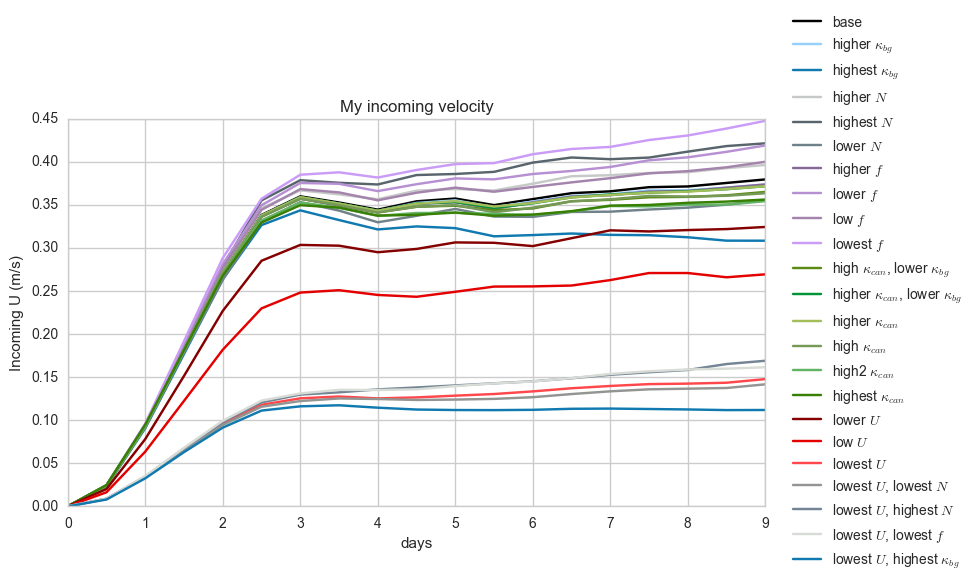

In [50]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)

for rec in records:
    filestate = ('/data/kramosmu/results/TracerExperiments/%s/%s/stateGlob.nc' 
                 %(rec.exp_code,rec.run_num))
   
    with Dataset(filestate, 'r') as nbl:
        u_ts = nbl.variables['U'][:,16:21,230:251,120]
        u_mean = np.mean(nbl.variables['U'][8:18,16:21,230:251,120])
        u_std = np.std(nbl.variables['U'][8:18,16:21,230:251,120])
        
    ax.plot(np.linspace(0,9,19),np.mean(np.mean(u_ts,axis=1),axis=1),color=sns.xkcd_rgb[rec.color2],
            label=rec.label)
    print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % (rec.paperName, u_mean, u_std))

ax.set_title('My incoming velocity')
ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')
ax.legend(bbox_to_anchor=(1.3,1.3))    

Base : 0.364 $\pm$ 0.013 ms$^-1$
higher\_Kbg : 0.361 $\pm$ 0.013 ms$^-1$
highest\_Kbg : 0.321 $\pm$ 0.016 ms$^-1$
higher\_N : 0.379 $\pm$ 0.014 ms$^-1$
highest\_N : 0.399 $\pm$ 0.015 ms$^-1$
lower\_N : 0.344 $\pm$ 0.011 ms$^-1$
higher\_f : 0.359 $\pm$ 0.013 ms$^-1$
low\_f : 0.392 $\pm$ 0.017 ms$^-1$
lower\_f : 0.378 $\pm$ 0.015 ms$^-1$
lowest\_f : 0.414 $\pm$ 0.021 ms$^-1$
highestKc\_lowKbg : 0.354 $\pm$ 0.011 ms$^-1$
higherKc\_lowKbg : 0.359 $\pm$ 0.012 ms$^-1$
higher\_Kc : 0.359 $\pm$ 0.012 ms$^-1$
high\_Kc : 0.354 $\pm$ 0.011 ms$^-1$
high2\_Kc : 0.346 $\pm$ 0.010 ms$^-1$
highest\_Kc : 0.347 $\pm$ 0.010 ms$^-1$
low\_U : 0.312 $\pm$ 0.012 ms$^-1$
lower\_U : 0.258 $\pm$ 0.010 ms$^-1$
lowest\_U : 0.137 $\pm$ 0.008 ms$^-1$
lowestU\_lowestN : 0.132 $\pm$ 0.007 ms$^-1$
lowestU\_highestN : 0.153 $\pm$ 0.010 ms$^-1$
lowestU\_lowestf : 0.150 $\pm$ 0.010 ms$^-1$
lowestU\_highestKbg : 0.114 $\pm$ 0.003 ms$^-1$


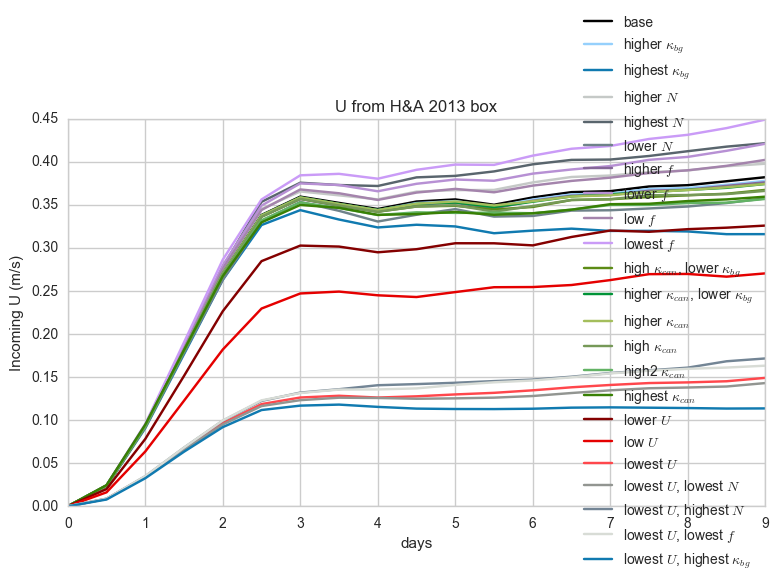

In [49]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)

for rec in records:
    filestate = ('/data/kramosmu/results/TracerExperiments/%s/%s/stateGlob.nc' 
                 %(rec.exp_code,rec.run_num))
   
    with Dataset(filestate, 'r') as nbl:
        u_ts = nbl.variables['U'][:,15:19,230:251,120]
        u_mean = np.mean(nbl.variables['U'][8:19,15:19,230:251,120])
        u_std = np.std(nbl.variables['U'][8:19,15:19,230:251,120])
        
    ax.plot(np.linspace(0,9,19),np.mean(np.mean(u_ts,axis=1),axis=1),color=sns.xkcd_rgb[rec.color2],
            label=rec.label)
    print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % (rec.paperName, u_mean, u_std))
 

ax.set_title('U from H&A 2013 box')
ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')

ax.legend(bbox_to_anchor=(1.3,1.3))    

Barkley : 0.359 $\pm$ 0.010 ms$^-1$
Parabolic : 0.360 $\pm$ 0.011 ms$^-1$


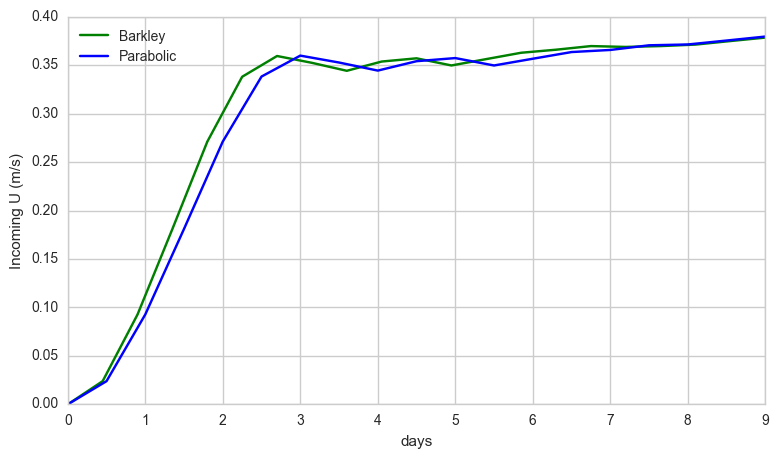

In [12]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)


filestate1 = ('/data/kramosmu/results/TracerExperiments/BARKLEY/run01/stateGlob.nc') 
filestate2 = ('/data/kramosmu/results/TracerExperiments/CNTDIFF_7Tr/run01/stateGlob.nc') 
                
with Dataset(filestate1, 'r') as nbl:
    u_ts = nbl.variables['U'][:,16:21,230:251,120]
    u_mean = np.mean(nbl.variables['U'][6:18,16:21,230:251,120])
    u_std = np.std(nbl.variables['U'][6:18,16:21,230:251,120])
        
ax.plot(np.linspace(0,9,21),np.mean(np.mean(u_ts,axis=1),axis=1),color='green',label="Barkley")
print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % ('Barkley', u_mean, u_std))

with Dataset(filestate2, 'r') as nbl:
    u_ts = nbl.variables['U'][:,16:21,230:251,120]
    u_mean = np.mean(nbl.variables['U'][6:18,16:21,230:251,120])
    u_std = np.std(nbl.variables['U'][6:18,16:21,230:251,120])
        
ax.plot(np.linspace(0,9,19),np.mean(np.mean(u_ts,axis=1),axis=1),color='blue',label="Parabolic")
print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % ('Parabolic', u_mean, u_std))

ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')
ax.legend(loc=0)    